In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("output/sales_data.csv", sep=";")
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderStatus,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,completed,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,completed,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,completed,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,completed,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,completed,20.34


In [3]:
#manual search for non-products
unique_products = df[["StockCode", "Description"]].drop_duplicates().sort_values("StockCode")
unique_products.to_csv("output/products_with_charges.csv", sep=";")


In [4]:
#remove non-products
non_products = ["AMAZONFEE", "C2", "B", "BANK CHARGES", "CRUK", "D", "DOT", "M", "POST", "m", "S"]
df_products_only = df[~df["StockCode"].isin(non_products)]
df_products_only.to_csv("output/products_only.csv", sep=";")

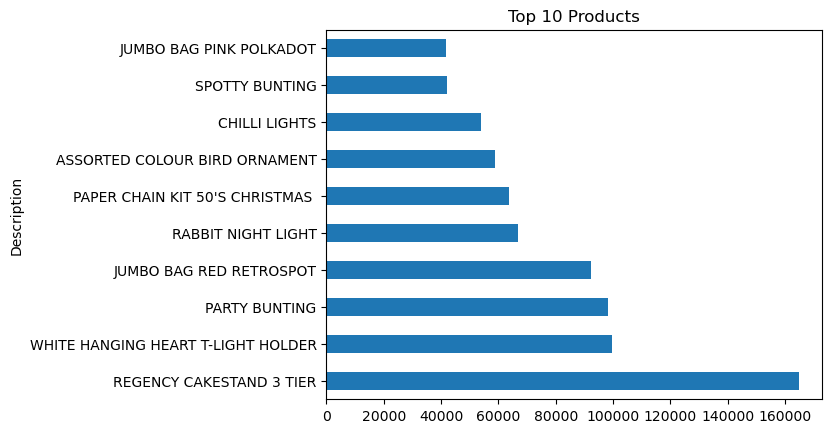

In [107]:
top_products = df_products_only.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", title="Top 10 Products")
plt.savefig("output/top_ten.png", dpi=300, bbox_inches="tight")

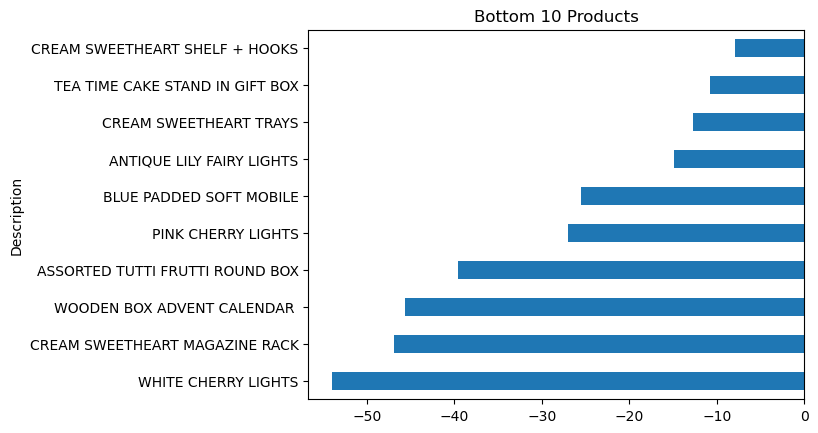

In [108]:
top_products = df_products_only.groupby("Description")["TotalPrice"].sum().sort_values(ascending=True).head(10)
top_products.plot(kind="barh", title="Bottom 10 Products")
plt.savefig("output/bot_ten.png", dpi=300, bbox_inches="tight")

<Axes: title={'center': 'top country by sales'}, ylabel='Country'>

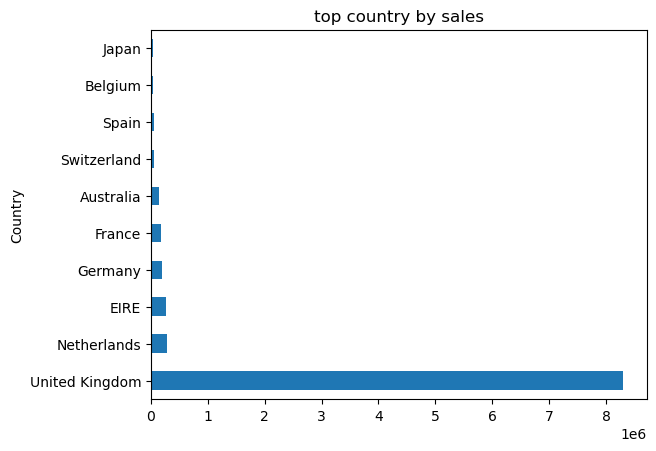

In [68]:
sales_by_country = df_products_only.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
sales_by_country.head(10).plot(kind="barh", title="top country by sales")